# Predict Laptop Selling Price

## Problem Statement: "Predict the selling price of used laptops based on their features such as brand, processor type, RAM size, storage size, screen size, and age."

This is a regression problem where the target variable is continuous (price in ₹ or $).

| Step | What We’ll Do                                   |
| ---- | ----------------------------------------------- |
| 1️⃣  | Create sample dataset (20–30 rows)              |
| 2️⃣  | Data Cleaning (missing values, duplicates)      |
| 3️⃣  | Data Preprocessing (label encoding, scaling)    |
| 4️⃣  | Feature Engineering (create useful features)    |
| 5️⃣  | Train-Test Split                                |
| 6️⃣  | Train a Decision Tree Regressor                 |
| 7️⃣  | Evaluate using R² and RMSE                      |
| 8️⃣  | Visualize Feature Importance                    |
| 9️⃣  | Pros, Cons, When to use Decision Tree Regressor |





In [1]:
# Simulated Dataset (Laptop Data)
import pandas as pd

data = pd.DataFrame({
    'brand': ['Dell', 'HP', 'Lenovo', 'Apple', 'Asus', 'Acer', 'Dell', 'HP', 'Lenovo', 'Apple',
              'Dell', 'HP', 'Asus', 'Lenovo', 'Apple', 'Dell', 'Acer', 'HP', 'Asus', 'Dell'],
    'processor': ['i5', 'i7', 'i3', 'M1', 'i5', 'i3', 'i7', 'i5', 'i7', 'M2',
                  'i3', 'i5', 'i7', 'i5', 'M2', 'i3', 'i3', 'i5', 'i7', 'i5'],
    'ram_gb': [8, 16, 4, 8, 8, 4, 16, 8, 16, 8,
               4, 8, 16, 8, 8, 4, 4, 8, 16, 8],
    'storage_gb': [512, 1024, 256, 512, 512, 256, 1024, 512, 1024, 512,
                   256, 512, 1024, 512, 512, 256, 256, 512, 1024, 512],
    'screen_size_inch': [15.6, 15.6, 14, 13.3, 15.6, 14, 15.6, 15.6, 15.6, 13.6,
                         14, 15.6, 15.6, 15.6, 13.6, 14, 14, 15.6, 15.6, 15.6],
    'age_years': [1, 2, 3, 1, 2, 4, 1, 3, 2, 1,
                  4, 3, 1, 2, 1, 5, 4, 2, 1, 3],
    'selling_price': [55000, 65000, 30000, 90000, 48000, 27000, 68000, 52000, 70000, 95000,
                      28000, 50000, 72000, 53000, 97000, 25000, 26000, 49000, 71000, 51000]
})


In [2]:
# Data Cleaning
print(data.isnull().sum())  # Check missing values
data.drop_duplicates(inplace=True)  # Remove duplicates if any


brand               0
processor           0
ram_gb              0
storage_gb          0
screen_size_inch    0
age_years           0
selling_price       0
dtype: int64


In [3]:
# Data Preprocessing (Label Encoding)

from sklearn.preprocessing import LabelEncoder

le_brand = LabelEncoder()
le_processor = LabelEncoder()

data['brand_encoded'] = le_brand.fit_transform(data['brand'])
data['processor_encoded'] = le_processor.fit_transform(data['processor'])

data.drop(['brand', 'processor'], axis=1, inplace=True)


In [4]:
# Feature & Target Split
X = data.drop('selling_price', axis=1)
y = data['selling_price']


In [5]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Train Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)



In [12]:
# Evaluation

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))


R² Score: 0.7612
RMSE: 7193.75


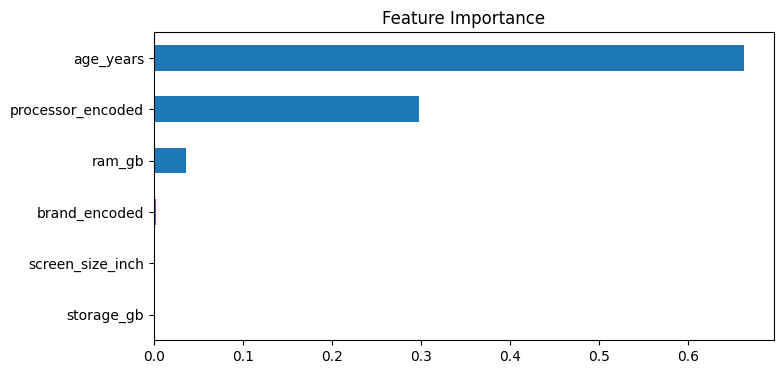

In [10]:
# Feature Importance
import matplotlib.pyplot as plt

feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 4), title="Feature Importance")
plt.show()


When to Use Decision Tree Regressor?
📌 Use When:
You expect non-linear relationships

You want interpretability (can draw tree)

You want a quick model without feature scaling

✅ Pros:
Handles both numeric & categorical

No need for scaling

Captures feature interactions

❌ Cons:
Can overfit on small data

Sensitive to noise

Unstable splits (small changes → different tree)

In [13]:
# Hyperparameter Tuning with GridSearchCV
# Import Required Tools
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [14]:
# Define the Parameter Grid

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4]
}




In [15]:
# Use GridSearchCV to Search Best Model
dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 10]},
             scoring='neg_mean_squared_error')

In [16]:
# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
# Evaluate Tuned Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_tuned = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

print("Tuned R² Score:", round(r2, 4))
print("Tuned RMSE:", round(rmse, 2))


Tuned R² Score: 0.7612
Tuned RMSE: 7193.75


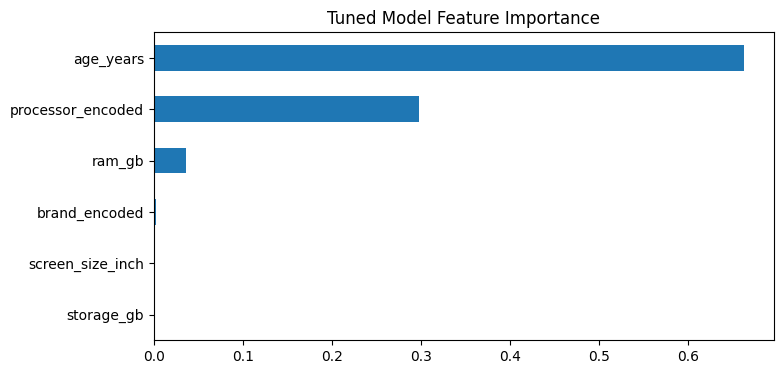

In [18]:
# Feature Importance (Optional)
import matplotlib.pyplot as plt

pd.Series(
    best_model.feature_importances_, index=X.columns
).sort_values().plot(kind='barh', figsize=(8, 4), title="Tuned Model Feature Importance")
plt.show()


| Hyperparameter      | Meaning                            | Effect                         |
| ------------------- | ---------------------------------- | ------------------------------ |
| `max_depth`         | Max tree depth                     | Controls overfitting           |
| `min_samples_split` | Min samples needed to split a node | Higher = simpler trees         |
| `min_samples_leaf`  | Min samples in each leaf node      | Prevents tiny noisy leaf nodes |
